In [ ]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.DataFrame()
data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        pass
    else:
        raw_data = pd.read_csv('mct31_data/' + filename)
        raw_data['GDatetime'] = pd.to_datetime(raw_data['GDatetime']).dt.round('S')
        raw_data.set_index('GDatetime', inplace=True)
        raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
        raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
        raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
        raw_data['F_ToolNum'] = raw_data['F_ToolNum'].fillna(0)
        raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1, inplace=True)
        raw_data = raw_data.resample('1T').mean()
        data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat(data_list, axis=0)
data

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,,,,,,
2023-05-18 14:38:00,1.000000,431125.657143,170271.542857,1911.142857,1775.171429,2.514286,681.828571,40.00,32.539999,38.599999,0.114286,0.56,216.630571,17.108314,4.285714,4.086686,0.571343,59.977429,41.0
2023-05-18 14:39:00,1.000000,431201.966667,170323.266667,1983.533333,1199.183333,2.616667,683.200000,27.75,32.530000,38.603332,0.050000,0.56,216.347667,19.064650,5.176467,4.305050,0.625200,59.981834,41.0
2023-05-18 14:40:00,1.000000,431265.227273,170386.681818,2043.318182,1333.045455,1.500000,680.000000,5.00,32.581817,38.590908,0.090909,0.56,215.886817,15.752364,3.862727,4.031000,0.566364,59.998637,41.0
2023-05-18 14:41:00,1.000000,431411.557692,170497.615385,2192.019231,1333.038462,2.788462,680.000000,5.00,32.561538,38.632692,0.038462,0.56,217.155001,16.041461,3.993673,4.102712,0.572135,59.990386,41.0
2023-05-18 14:42:00,1.000000,431503.283333,170583.566667,2285.566667,1333.033333,2.450000,680.000000,5.00,32.553333,38.661667,0.033333,0.56,218.552333,16.153900,4.031633,4.168033,0.569667,59.994334,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 20:19:00,1.000000,943262.779661,802552.813559,2075.711864,1465.949153,1.711864,680.135593,39.00,37.155932,41.511864,0.000000,0.56,220.711356,15.305644,3.488949,4.205153,0.517407,59.993391,45.0
2023-07-03 20:20:00,1.000000,943361.583333,802616.933333,2175.083333,719.933333,1.716667,688.133333,51.25,37.150000,41.475000,0.100000,0.56,220.538500,17.857150,4.612800,4.342800,0.574700,59.983334,45.0
2023-07-03 20:21:00,1.000000,943461.833333,802634.300000,2276.050000,658.066667,14.166667,685.333333,38.85,37.143333,41.450001,0.250000,0.56,220.628000,21.269833,5.088133,4.783467,0.533083,59.997001,45.0


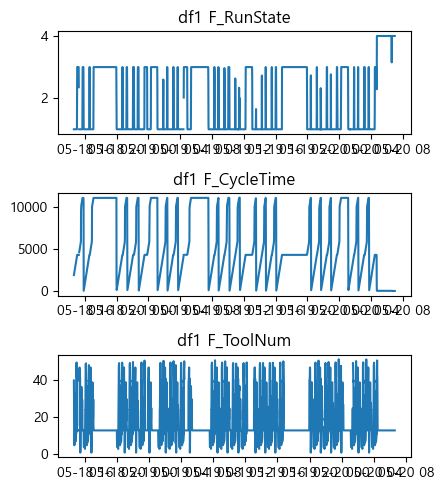

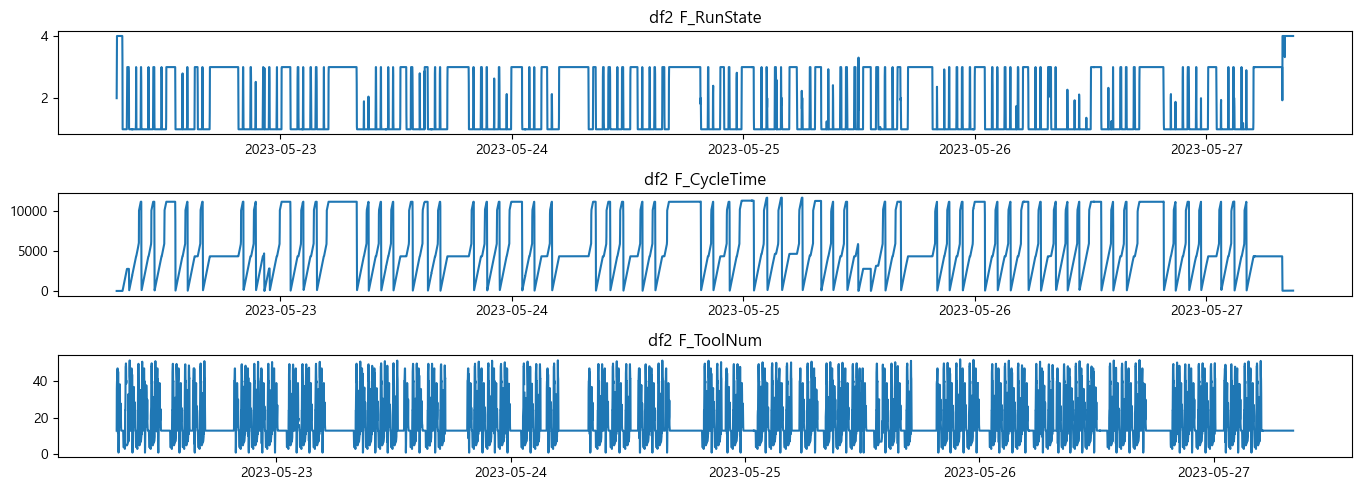

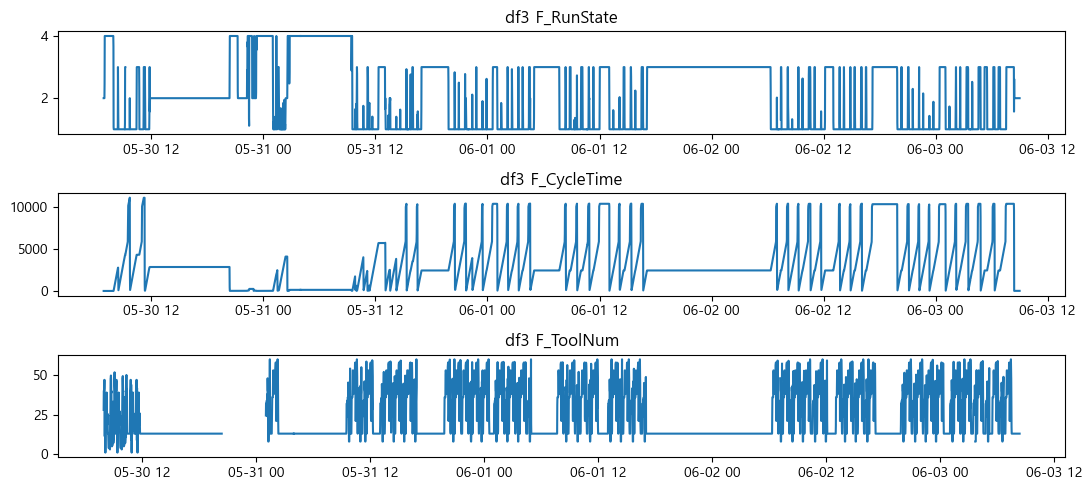

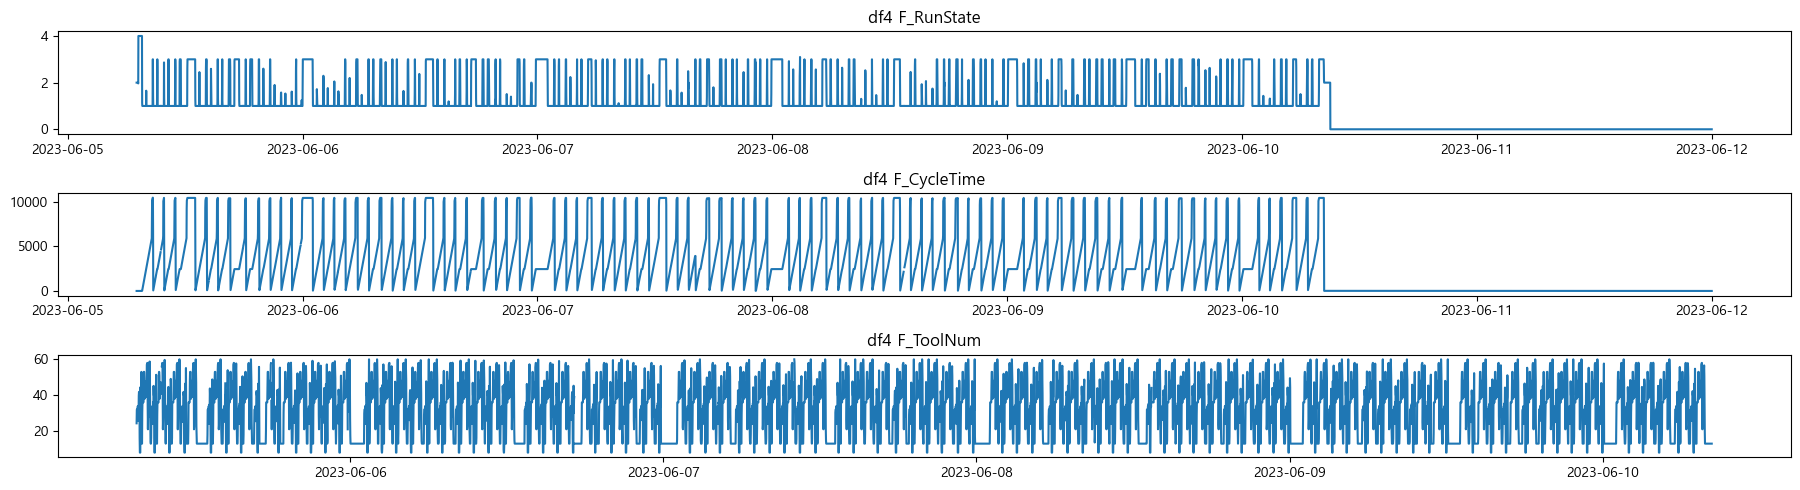

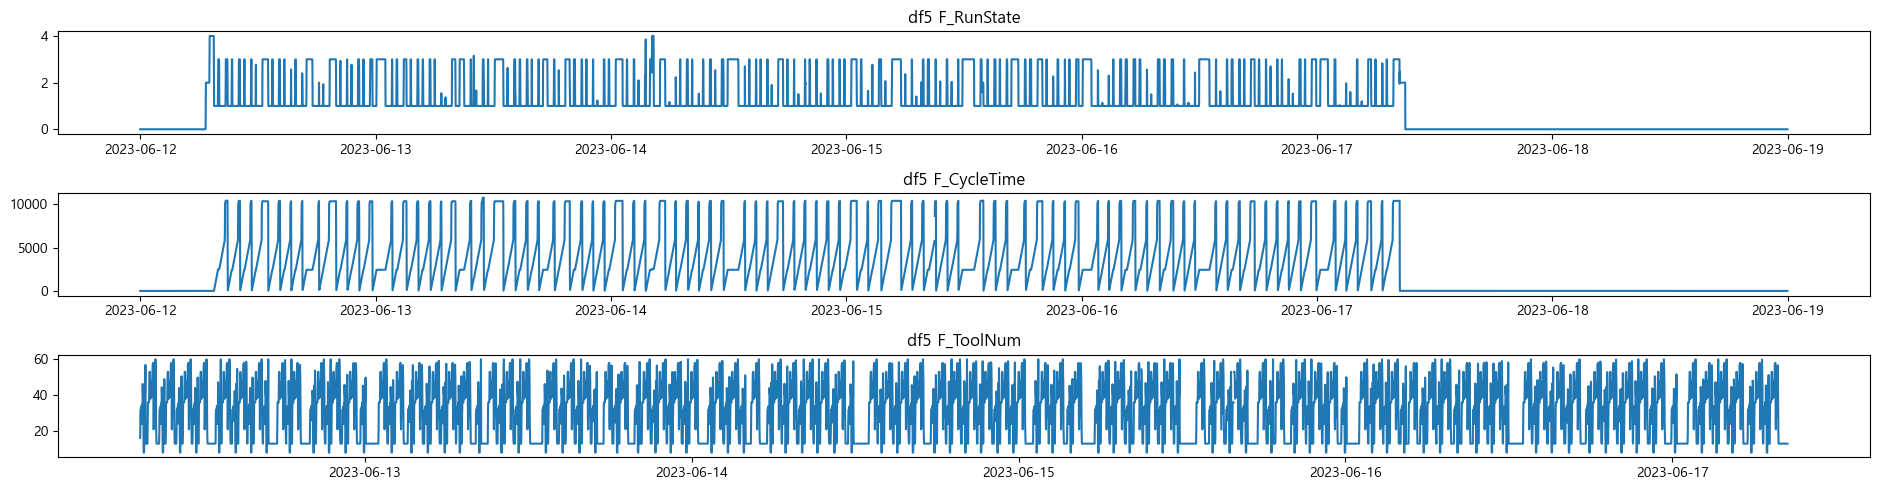

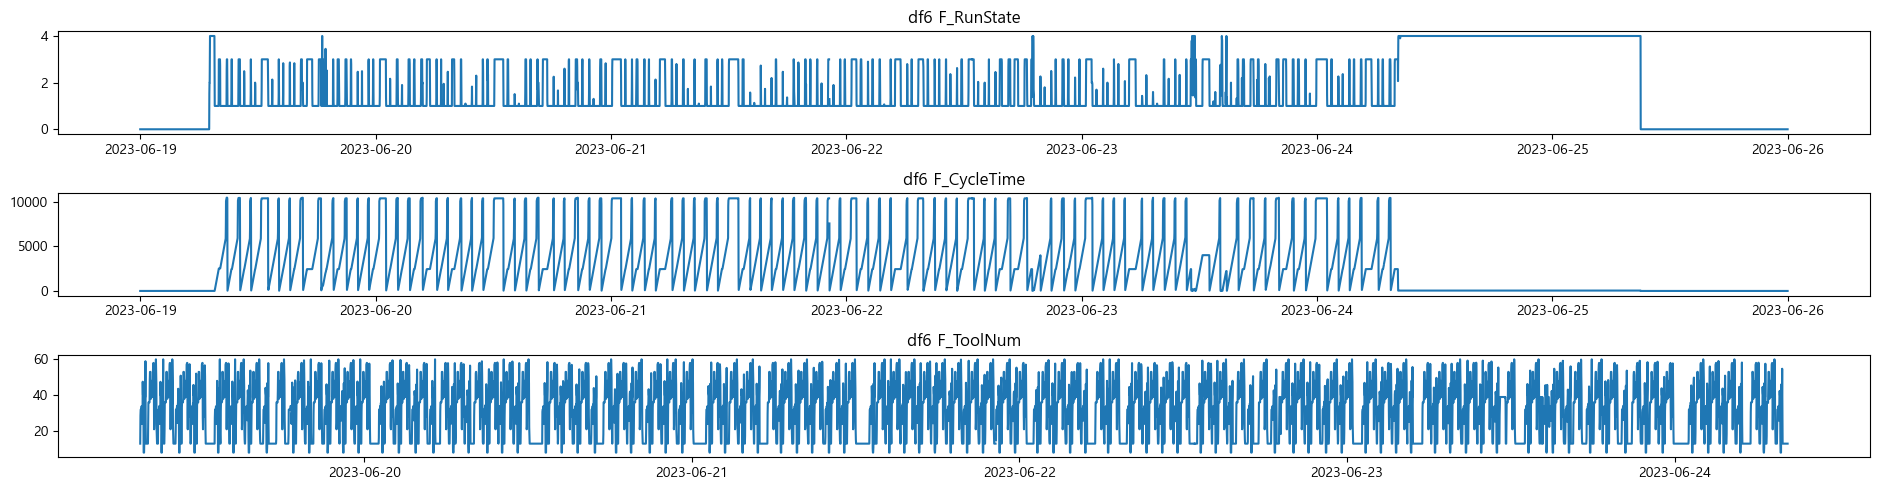

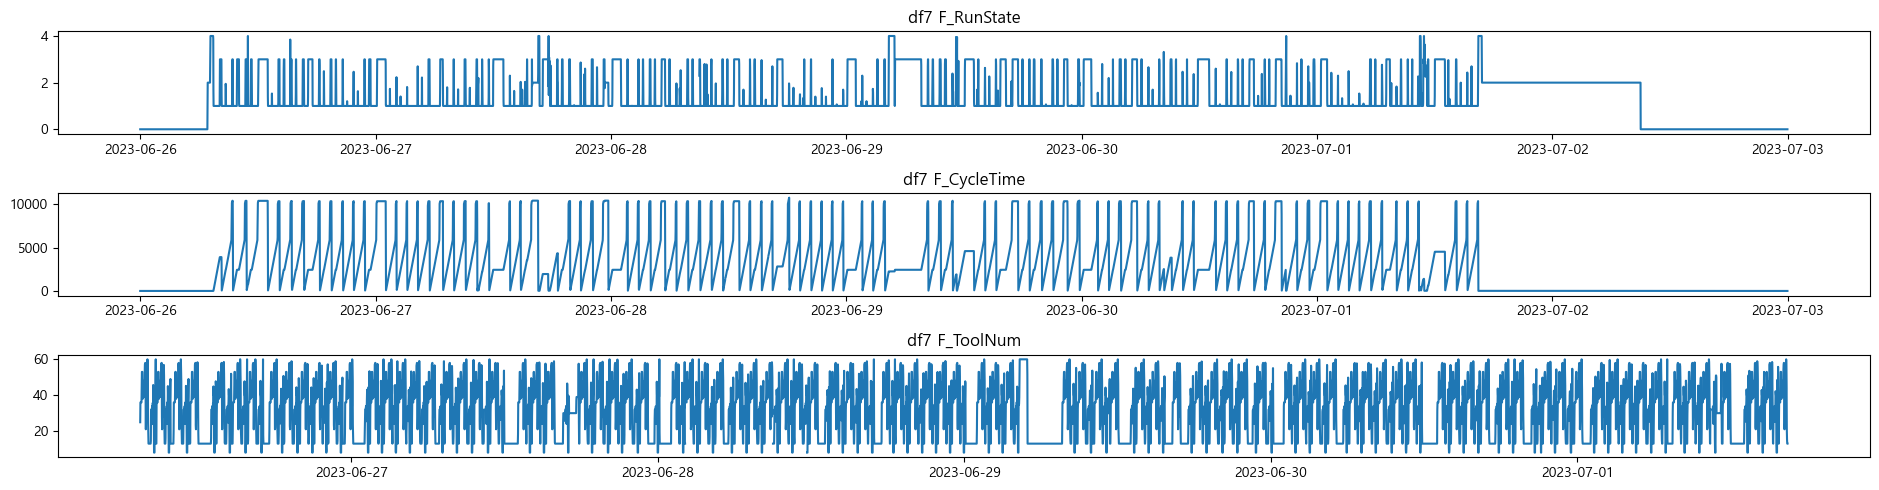

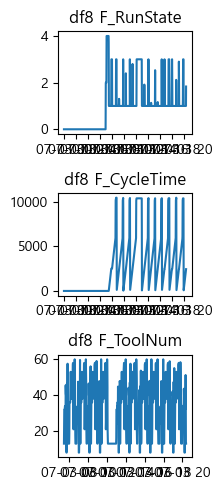

In [ ]:
for i, data in enumerate(data_list):
    drange = pd.date_range(start=data.index.astype('str')[0], end=data.index.astype('str')[-1], freq='s')

    fig, ax = plt.subplots(3, 1, figsize=(len(drange)/32000, 5))
    ax[0].plot(data.loc[data.index.min():data.index.max(), 'F_RunState'])
    ax[1].plot(data.loc[data.index.min():data.index.max(), 'F_CycleTime'])
    ax[2].plot(data.loc[data.index.min():data.index.max(), 'F_ToolNum'])
    ax[0].set_title(f'df{i+1} F_RunState')
    ax[1].set_title(f'df{i+1} F_CycleTime')
    ax[2].set_title(f'df{i+1} F_ToolNum')
    plt.tight_layout()
    plt.show()

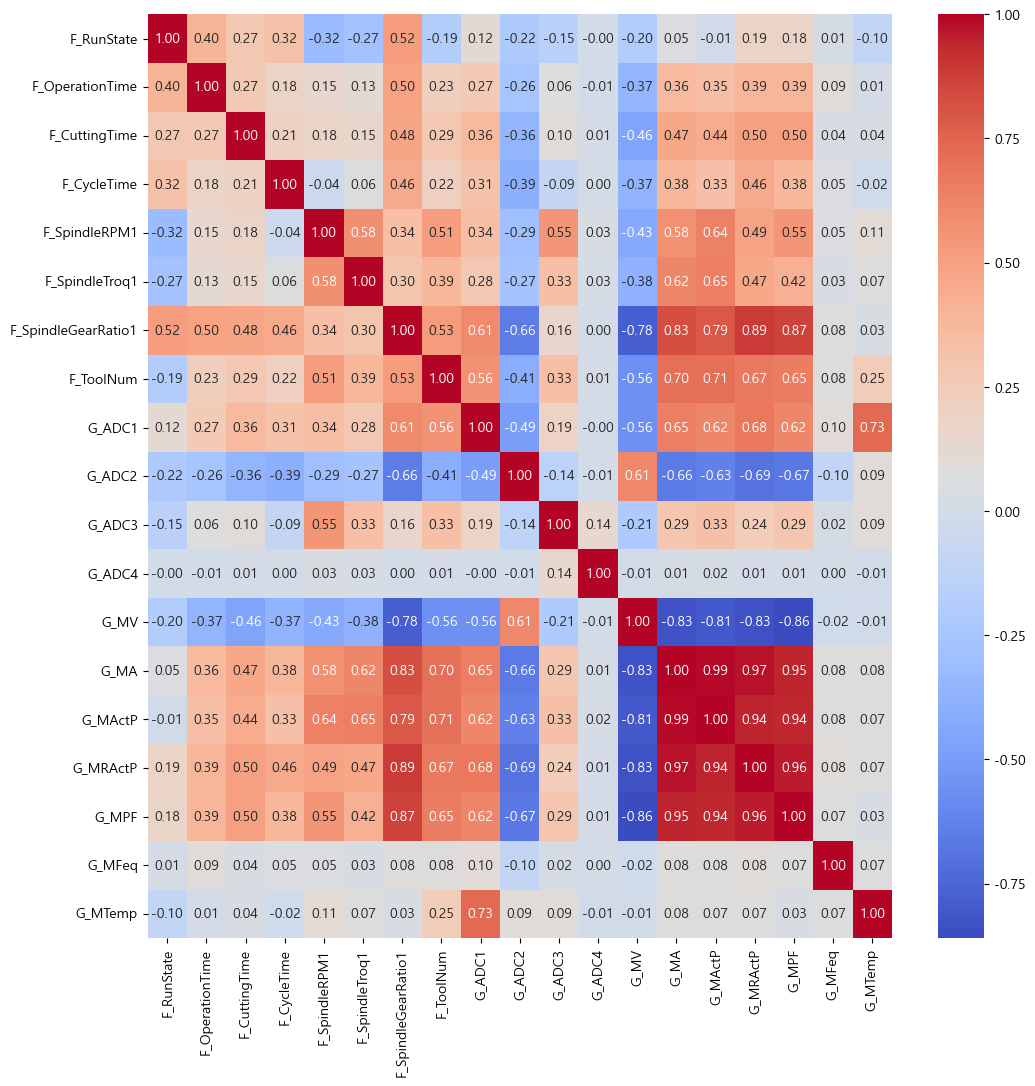

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

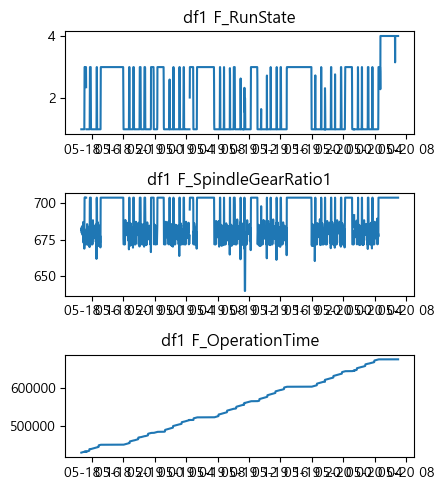

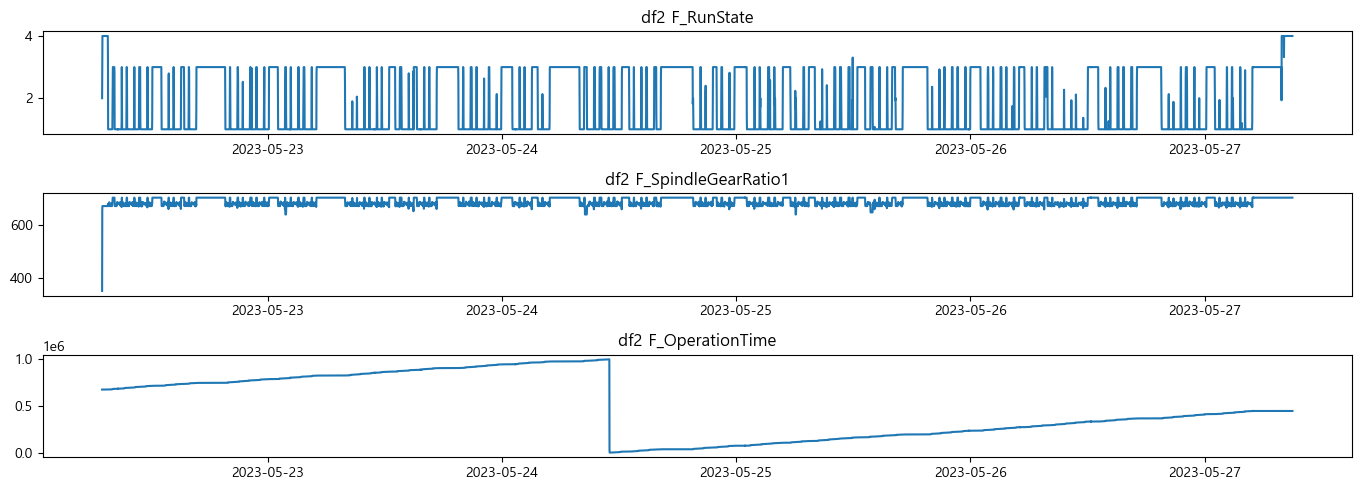

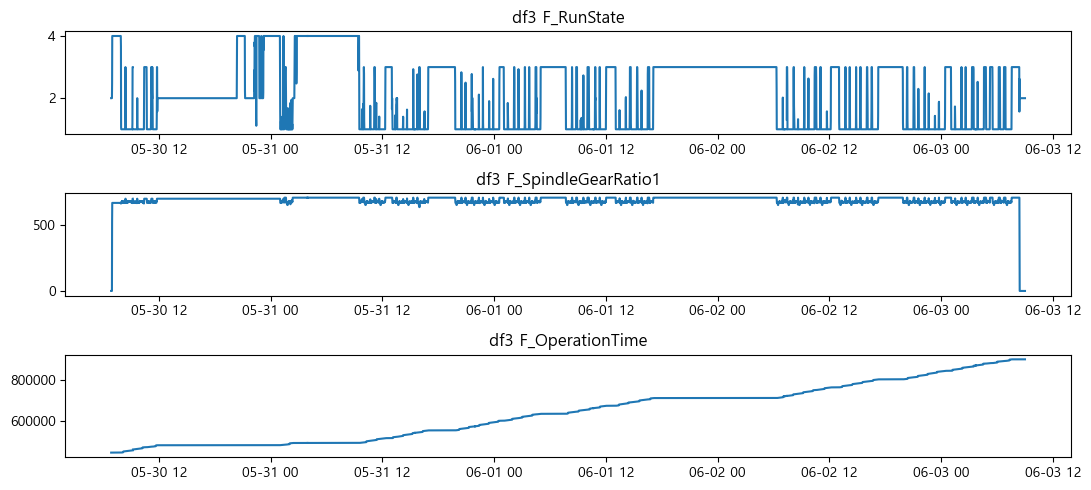

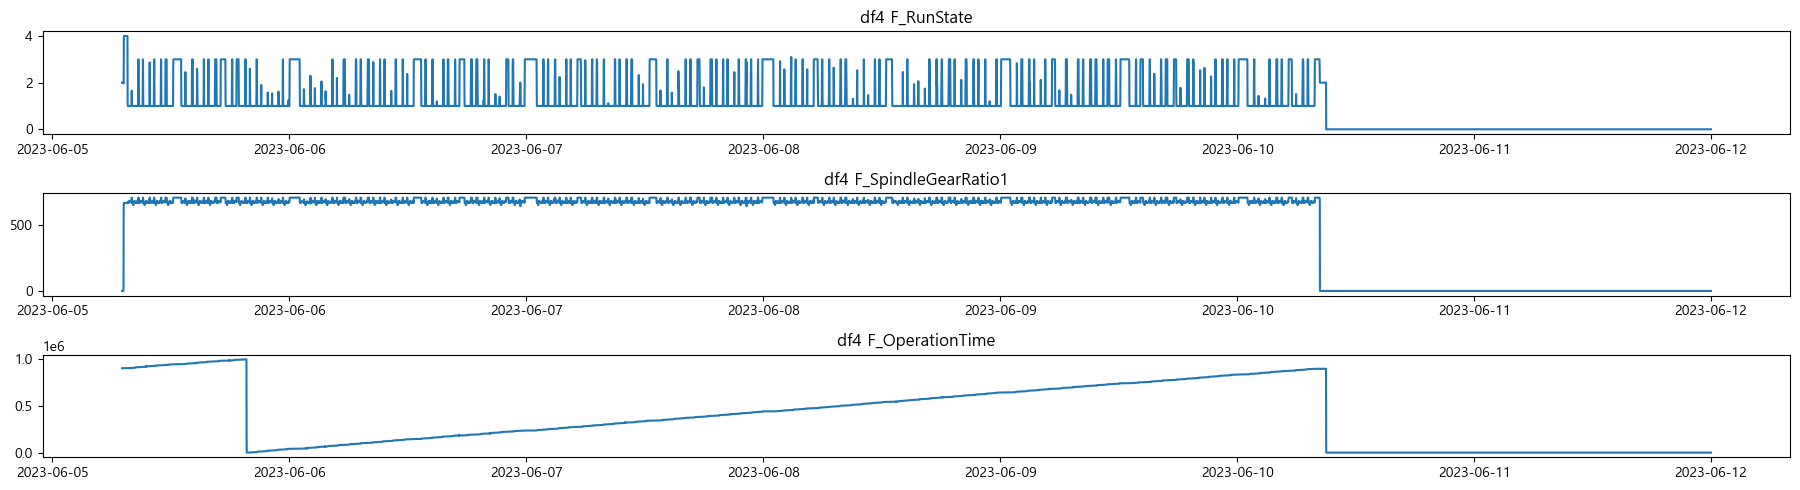

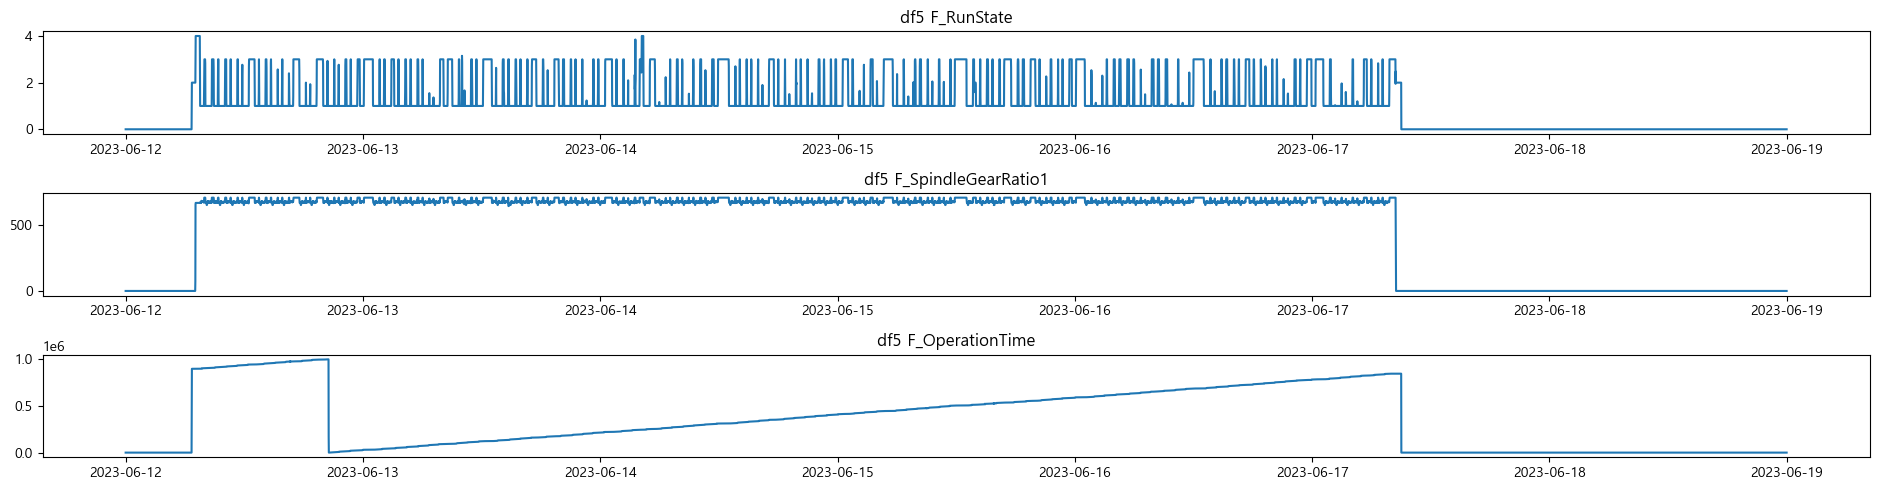

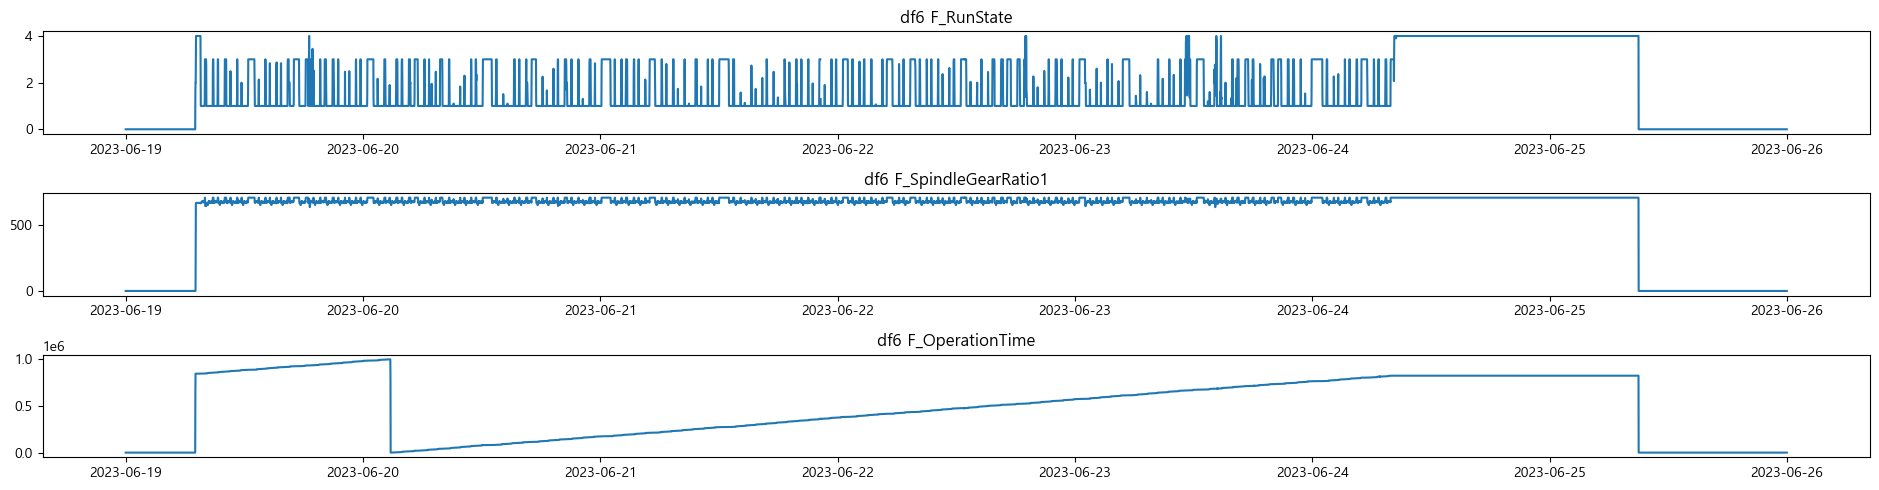

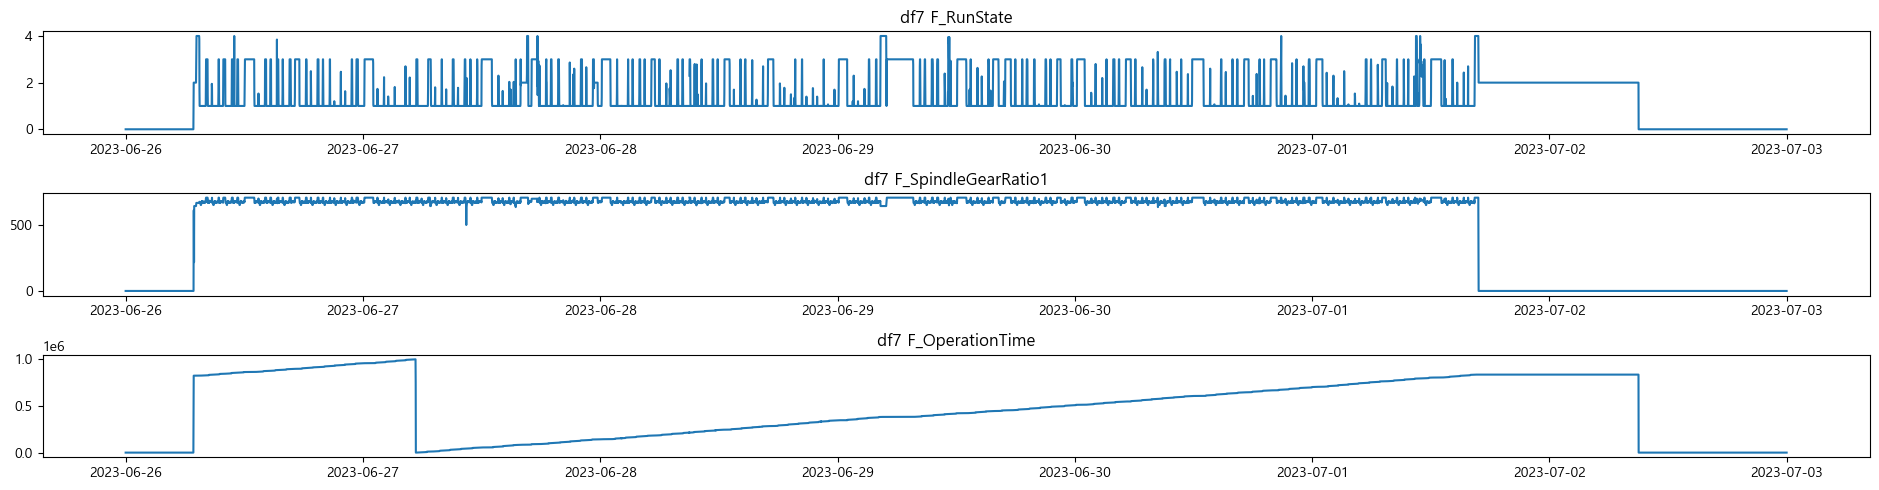

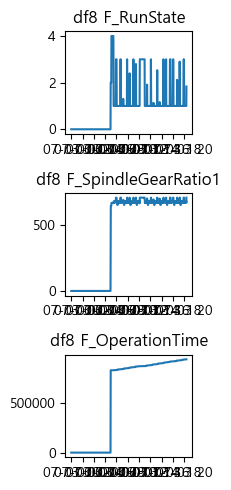

In [ ]:
for i, data in enumerate(data_list):
    drange = pd.date_range(start=data.index.astype('str')[0], end=data.index.astype('str')[-1], freq='s')

    fig, ax = plt.subplots(3, 1, figsize=(len(drange)/32000, 5))
    ax[0].plot(data.loc[data.index.min():data.index.max(), 'F_RunState'])
    ax[1].plot(data.loc[data.index.min():data.index.max(), 'F_SpindleGearRatio1'])
    ax[2].plot(data.loc[data.index.min():data.index.max(), 'F_OperationTime'])
    ax[0].set_title(f'df{i+1} F_RunState')
    ax[1].set_title(f'df{i+1} F_SpindleGearRatio1')
    ax[2].set_title(f'df{i+1} F_OperationTime')
    plt.tight_layout()
    plt.show()